# ARIMA
#### by Christopher Darren 00000054804

### Importing Libraries 📚

In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [225]:
print(sns.__version__)

0.12.2


### Data Understanding 👓

In [226]:
df = pd.read_csv('./dataset/playerdata.csv', index_col=['DateTime'], parse_dates=['DateTime'])
df.head(5)

,Players,Average Players
DateTime,,
2011-11-30,680.0,NaN
2011-12-01,NaN,NaN
2011-12-02,NaN,NaN
2011-12-03,NaN,NaN
2011-12-04,NaN,NaN


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4293 entries, 2011-11-30 to 2023-08-31
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Players          4130 non-null   float64
 1   Average Players  343 non-null    float64
dtypes: float64(2)
memory usage: 100.6 KB


In [228]:
df.describe()

,Players,Average Players
count,4.130000e+03,3.430000e+02
mean,5.824735e+05,8.267761e+05
std,3.644661e+05,1.822924e+05
min,2.040000e+02,5.401400e+05
25%,3.720188e+05,6.752670e+05
50%,5.888870e+05,8.309250e+05
75%,8.322902e+05,9.347175e+05
max,1.818773e+06,1.306150e+06


In [229]:
df.shape

(4293, 2)

In [64]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

KeyError: 'DateTime'

In [65]:
df['DateTime'] = df['DateTime'].dt.date


KeyError: 'DateTime'

In [230]:
print(df.dtypes)

Players            float64
Average Players    float64
dtype: object


In [231]:
csdf = df.drop(['Average Players'], axis=1)
csdf

,Players
DateTime,
2011-11-30,680.0
2011-12-01,NaN
2011-12-02,NaN
2011-12-03,NaN
2011-12-04,NaN
...,...
2023-08-27,1369511.0
2023-08-28,1264878.0
2023-08-29,1251061.0


In [109]:
csdf = pd.DataFrame(df)

In [217]:
# csdf[['Players','Average Players']] = csdf[['Players','Average Players']].fillna(0)
# csdf.head(10)

In [232]:
csdf['Players'] = csdf['Players'].fillna(0)
csdf.head(10)

,Players
DateTime,
2011-11-30,680.0
2011-12-01,0.0
2011-12-02,0.0
2011-12-03,0.0
2011-12-04,0.0
2011-12-05,0.0
2011-12-06,0.0
2011-12-07,0.0
2011-12-08,0.0


In [233]:
csdf.head(5)

,Players
DateTime,
2011-11-30,680.0
2011-12-01,0.0
2011-12-02,0.0
2011-12-03,0.0
2011-12-04,0.0


In [234]:
print(csdf.head())

            Players
DateTime           
2011-11-30    680.0
2011-12-01      0.0
2011-12-02      0.0
2011-12-03      0.0
2011-12-04      0.0


In [235]:
csdf.isnull().sum()

Players    0
dtype: int64

In [236]:
csdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4293 entries, 2011-11-30 to 2023-08-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Players  4293 non-null   float64
dtypes: float64(1)
memory usage: 67.1 KB


<Axes: xlabel='DateTime'>

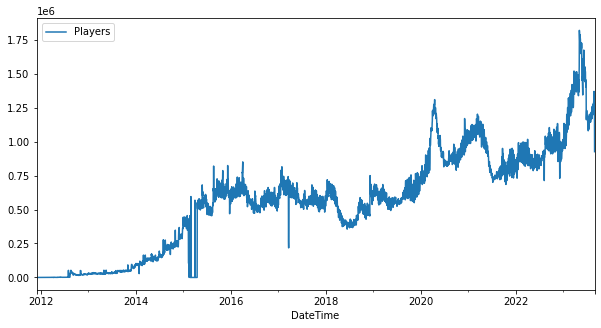

In [237]:
csdf.plot(figsize=(10,5))

In [218]:
# sns.lineplot(data=csdf, x="DateTime", y="Average Players")
# plt.title("Average Players on CSGO from 2012-now")
# plt.show()

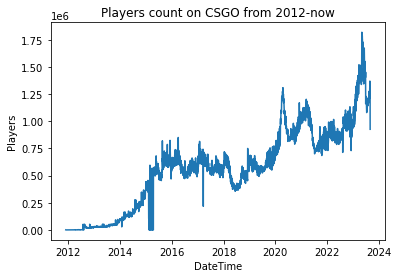

In [238]:
sns.lineplot(data=csdf, x="DateTime", y="Players")
plt.title("Players count on CSGO from 2012-now")
plt.show()

In [219]:
# corr = csdf.corr()
# plt.figure(figsize=(12,10))
# sns.heatmap(corr, annot=True)

### Check Stationary Data 🚉

ADF Statistic: -1.6320238043353077
p-value: 0.4664315515738108


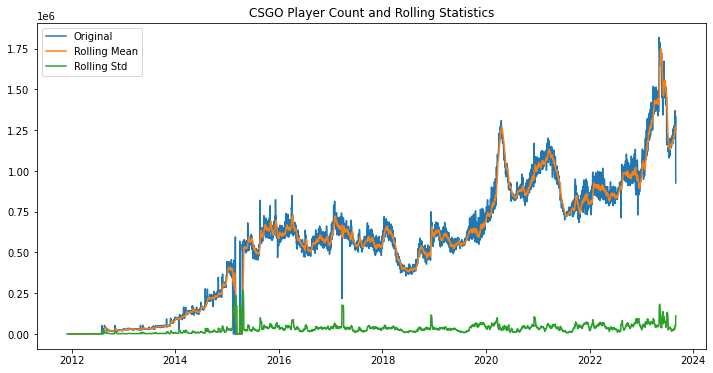

In [239]:
# Menggunakan teknik Dickey-Fuller test
result = adfuller(csdf['Players'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Membuat plot grafik rolling mean and standard deviation
rolling_mean = csdf['Players'].rolling(window=12).mean()
rolling_std = csdf['Players'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(csdf['Players'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc = 'best')
plt.title('CSGO Player Count and Rolling Statistics')
plt.show()

In [240]:
#stationary 
def ad_test(csdf):
    csdftest = adfuller(csdf, autolag='AIC')
    print("1. ADF Stats : ", csdftest[0])
    print("2. P-Value : ", csdftest[1])
    print("3. lags : ", csdftest[2])
    print("4. num of observations : ", csdftest[3])
    print("5. critical values : ")
    for key , val in csdftest[4].items():
        print("\t", key, ": ",val)

In [241]:
ad_test(csdf['Players'])

1. ADF Stats :  -1.6320238043353077
2. P-Value :  0.4664315515738108
3. lags :  31
4. num of observations :  4261
5. critical values : 
	 1% :  -3.4318856122567074
	 5% :  -2.8622185486666925
	 10% :  -2.567131196722582


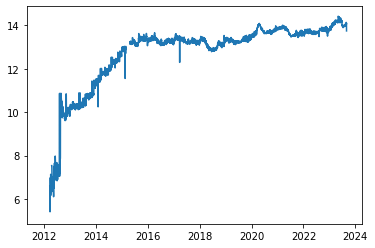

In [242]:
#membuat log

csdf_log = np.log(csdf)
plt.plot(csdf_log)


In [243]:
#test run ke 2 untuk ADF

def stationary(timeseries):

    # Membuat plot grafik rolling mean and standard deviation
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    #plot figure
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='purple', label='Rolling Mean')
    plt.plot(rolling_std, color='magenta', label='Rolling Std')
    plt.legend(loc = 'best')
    plt.title('CSGO Player Count and Rolling Statistics')
    plt.show()

    # Menggunakan teknik Dickey-Fuller test
    result = adfuller(timeseries['Players'])
    print("ADF Statistic: {}".format(result[0]))
    print("p-value:".format(result[1]))
    print("Critical values : ")
    for key, value in result[4].items():
        print("\t{}: {}".format(key, value))
    if result[0] < result [4]["5%"]:
        print("Reject H0- Time series is Stationary")
    else:
        print("Failed to reject H0 - Time series is Non-Stationary")


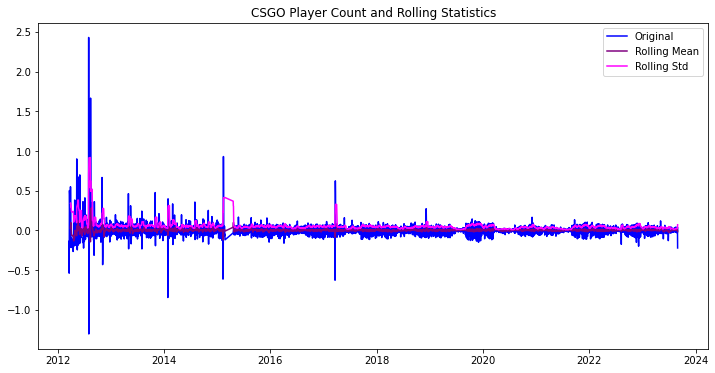

ADF Statistic: -13.727279671990578
p-value:
Critical values : 
	1%: -3.431951814918001
	5%: -2.862247794094088
	10%: -2.5671467656395834
Reject H0- Time series is Stationary


In [244]:
# Calculate and subtract a moving average
rolling_mean = csdf_log.rolling(window=3).mean()
stationary_data_mean = csdf_log - rolling_mean
stationary_data_mean.dropna(inplace=True)

stationary(stationary_data_mean)

### Optimal Parameter

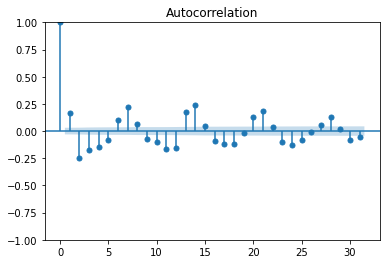

In [245]:
plt = sm.graphics.tsa.plot_acf(stationary_data_mean['Players'], lags=31)
plt.show()

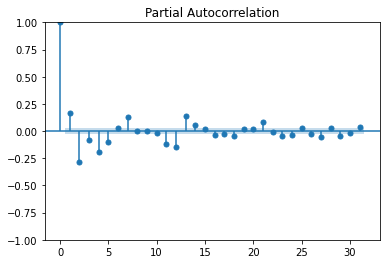

In [246]:
plt = sm.graphics.tsa.plot_pacf(stationary_data_mean['Players'], lags=31)
plt.show()

In [215]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [216]:
decomposition = seasonal_decompose(csdf_log) 
model = ARIMA(csdf_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

ValueError: This function does not handle missing values

In [52]:
check_arima = auto_arima(stationary_data_mean['Players'], trace=True, suppress_warnings=True)
check_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=103028.625, Time=2.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=104062.194, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=104032.815, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=104011.031, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=104060.294, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=103475.065, Time=0.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=103387.091, Time=0.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=102772.253, Time=2.63 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=103272.049, Time=0.86 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=102557.557, Time=3.67 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=103114.370, Time=0.81 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=102523.403, Time=4.91 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=102941.486, Time=1.04 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=102511.464, Time=5.44 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4293
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -51102.163
Date:                Fri, 01 Sep 2023   AIC                         102228.327
Time:                        13:12:07   BIC                         102304.701
Sample:                             0   HQIC                        102255.303
                               - 4293                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    499.1954    431.958      1.156      0.248    -347.427    1345.818
ar.L1          1.0201      0.027     37.754      0.000       0.967       1.073
ar.L2         -1.6038      0.022    -71.488      0.000      -1.648      -1.560
ar.L3          1.1100      0.038     29.488      0.000       1.036       1.184
ar.L4         -1.1470      0.021    -54.799      0.000      -1.188      -1.106
ar.L5          0.2187      0.025      8.898      0.000       0.171       0.267
ma.L1         -1.3650      0.026    -51.633      0.000      -1.417      -1.313
ma.L2          1.7738      0.028     62.991      0.000       1.719       1.829
ma.L3         -1.5426      0.035    -44.557      0.000      -1.610      -1.475
ma.L4          1.2743      0.024     52.746      0.000       1.227       1.322
ma.L5         -0.5001      0.018    -27.238      0.000      -0.536      -0.464
sigma2       1.47e+09      0.004   3.51e+11      0.000    1.47e+09    1.47e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):            746879.00
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             1.50
Prob(H) (two-sided):                  0.12   Kurtosis:                        67.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.92e+25. Standard errors may be unstable.
"""

In [53]:
from sklearn.model_selection import train_test_split

In [83]:
# X = csdf['DateTime']
# y = csdf['Players']

In [84]:
# X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# print(train.shape, test.shape)

In [56]:
print(csdf.shape)
train = csdf.iloc[:-20]
test = csdf.iloc[-20:]
print(train.shape, test.shape)

(4293, 2)
(4273, 2) (20, 2)


In [57]:
model= ARIMA(train['Players'], order=(5,1,5))
results = model.fit()
results.summary()

C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Players   No. Observations:                 4273
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -50798.631
Date:                Mon, 04 Sep 2023   AIC                         101619.262
Time:                        19:40:45   BIC                         101689.220
Sample:                    11-30-2011   HQIC                        101643.977
                         - 08-11-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9759      0.026     38.153      0.000       0.926       1.026
ar.L2         -1.5646      0.022    -70.906      0.000      -1.608      -1.521
ar.L3          1.0397      0.036     28.820      0.000       0.969       1.110
ar.L4         -1.1104      0.020    -54.868      0.000      -1.150      -1.071
ar.L5          0.1760      0.023      7.549      0.000       0.130       0.222
ma.L1         -1.3157      0.025    -52.188      0.000      -1.365      -1.266
ma.L2          1.7279      0.028     62.273      0.000       1.674       1.782
ma.L3         -1.4775      0.034    -43.044      0.000      -1.545      -1.410
ma.L4          1.2432      0.024     52.011      0.000       1.196       1.290
ma.L5         -0.4760      0.018    -26.084      0.000      -0.512      -0.440
sigma2      1.429e+09    6.4e-11   2.23e+19      0.000    1.43e+09    1.43e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):            771944.36
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             1.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        68.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.16e+34. Standard errors may be unstable.
"""

In [58]:
start = len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end,typ="levels")
print(pred)
pred.index=csdf.index[start:end+1]
print(pred)

TypeError: predict() missing 1 required positional argument: 'params'